In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/asus/OneDrive/Desktop/spam.csv", encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns =['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

# Renaming columns
df.rename(columns={'v1': 'target','v2':'text'}, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
# Checking duplicate values
df.duplicated().sum()

403

In [9]:
# Removing duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

# EDA

In [10]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

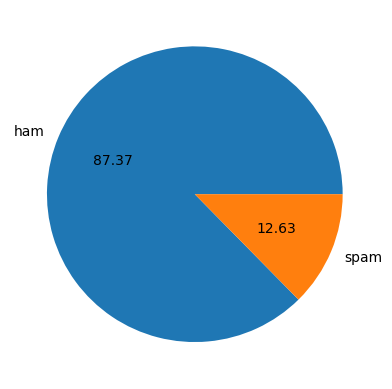

In [11]:
# Visualizing

plt.pie(df['target'].value_counts(), labels =['ham','spam'], autopct='%0.2f')
plt.show()

In [12]:
# Our data is imbalanced
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df['num_characters'] = df['text'].apply(len)
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [14]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.sample(5)

,target,text,num_characters,num_words,num_sentences
5228,1,PRIVATE! Your 2003 Account Statement for <fone...,146,27,3
3747,0,"A bit of Ur smile is my hppnss, a drop of Ur t...",152,40,1
4698,0,Yes fine,9,2,1
906,1,"all the lastest from Stereophonics, Marley, Di...",162,32,3
4493,0,Man this bus is so so so slow. I think you're ...,71,19,2


In [15]:
# ham
df[df['target']== 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [16]:
# spam
df[df['target']== 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: xlabel='num_characters', ylabel='Count'>

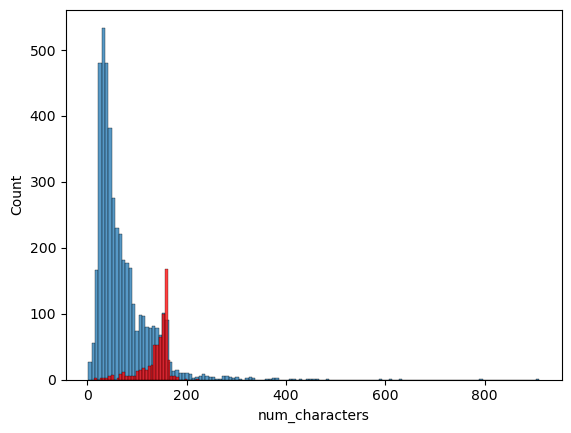

In [17]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

C:\Users\asus\AppData\Local\Temp\ipykernel_20068\2026696898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df.corr(), annot=True)


<Axes: >

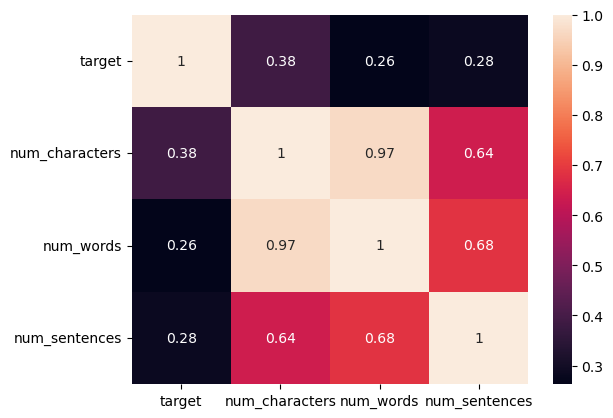

In [18]:
sns.heatmap( df.corr(), annot=True)

# Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stopwords & punctuation
* Stemming

In [19]:
from nltk.corpus import stopwords
import string

print(stopwords.words('english'))
print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [21]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [22]:
transform_text('Anyway holla at me whenever you')

'anyway holla whenev'

In [23]:
df['transformed_text'] = df['text'].apply(transform_text)
df['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 5169, dtype: object

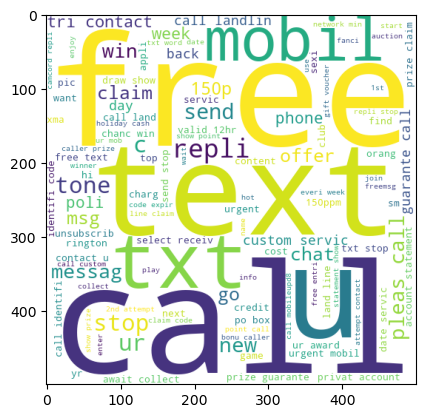

In [24]:
## Word Cloud Formation of Spam 
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')

spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep = " "))

plt.imshow(spam_wc)

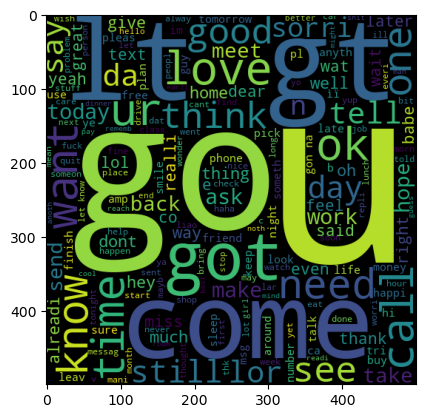

In [25]:
## Word Cloud Formation of ham 
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10)

spam_wc = wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep = " "))

plt.imshow(spam_wc)

In [26]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

9939

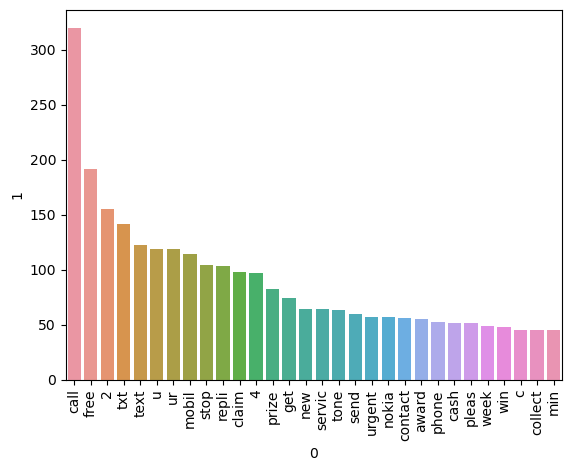

In [27]:
## Finding top 30 common words occur in spam messages
from collections import Counter

sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [28]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
len(ham_corpus)

35394

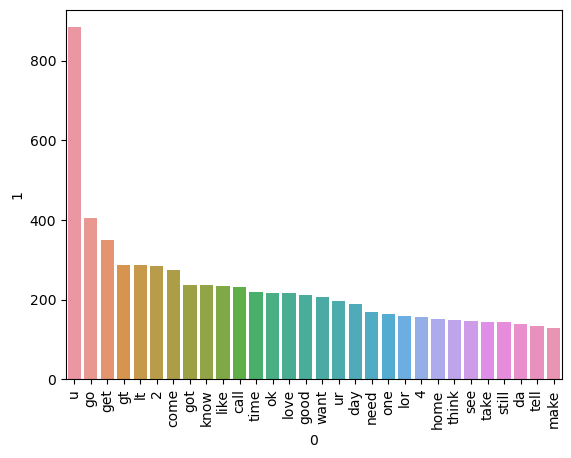

In [29]:
## Finding top 30 common words occur in spam messages
from collections import Counter

sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y =pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [31]:
X = cv.fit_transform(df['transformed_text']).toarray()

X.shape

(5169, 6708)

In [52]:
y = df['target'].values
y.shape

(5169,)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [63]:
gnb = GaussianNB() 
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [65]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [66]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
